In [1]:
import numpy as np
import oceanDAS as odas
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
%cd -q '/Users/hglover/Library/CloudStorage/Box-Box/FiberExperiments/DAScomparison_paper/'


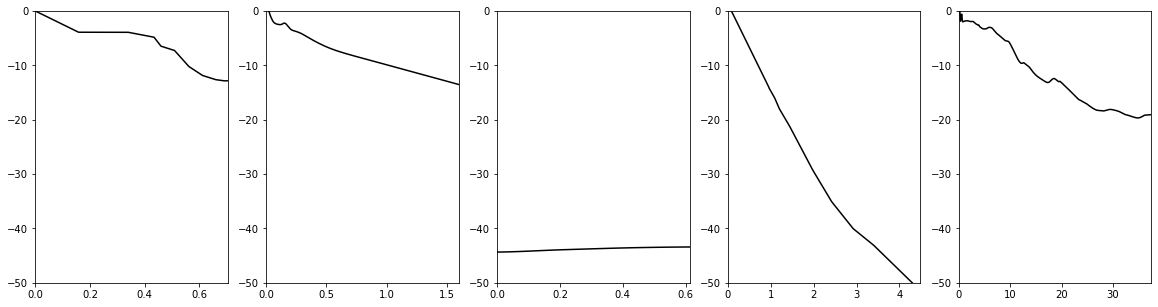

In [38]:
# plot example of KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
ns,nx = rawstrain.shape
depth[0:100] = np.linspace(0,-3.9,100)
X = np.arange(0,metadata['dx']*nx,metadata['dx'])/1000
fig, ax = plt.subplots(1,5,figsize=(20,5))
ax = ax.ravel()
ax[0].plot(X,depth,'k')
ax[0].set_xlim([0,max(X)])

# plot example of duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
depth = depth[50:]
nx = len(depth)
X = np.arange(0,metadata['dx']*nx,metadata['dx'])/1000
ax[1].plot(X,depth,'k')
ax[1].set_xlim([0,max(X)])

# plot example of Homer
pname = 'HomerAK_Williams/'
fname = 'GCI_TERRA_2p5Hz_data.h5'
onechn = False
rawstrain,das_time,chnl,depth,metadata = odas.loadHomer(pname,fname,onechn)
ns,nx = rawstrain.shape
X = np.arange(0,metadata['dx']*nx,metadata['dx'])/1000
ax[2].plot(X,depth,'k')
ax[2].set_xlim([0,max(X)])

# plot example of Florence
pname = 'FlorenceOR_Ifju/'
ff = np.genfromtxt(pname+'Florence_Depth.csv', delimiter=',')
dd = ff[:,1]
xx = ff[:,0]/1000
X = np.arange(0,5,0.01)
depth = np.interp(X,xx,dd)*(-1)
depth = depth[50:]
X = X[50:]-X[50]
ax[3].plot(X,depth,'k')
ax[3].set_xlim([0,max(X)])

# plot example of oliktok
pname = 'OliktokPoint_Smith/'
ff = np.genfromtxt(pname+'CODAS_info.csv', delimiter=',',skip_header=1)
X = ff[:,4]
depth = (-1)*ff[:,5] #define negative down
ax[4].plot(X,depth,'k')
ax[4].set_xlim([0,max(X)])

for jj in range(5):
    ax[jj].set_ylim([-50,0])

In [40]:
fig.savefig('figs/cableBathy.svg')